In [1]:
### Libraries required

In [2]:
import pandas as pd
import numpy as np
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

import matplotlib.pyplot as plt
from matplotlib import style
style.use("fivethirtyeight")


In [3]:
#Setting working directory
import os
os.chdir("/home/gabe/gatech/ml")

In [4]:
#Reading Data
data = pd.read_csv('tamizajes-cdmx.csv')
data.shape

/home/gabe/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (1,2,4,16) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


(1337185, 22)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1337185 entries, 0 to 1337184
Data columns (total 22 columns):
 #   Column                        Non-Null Count    Dtype  
---  ------                        --------------    -----  
 0   fuente                        1337185 non-null  object 
 1   uuid                          1337185 non-null  object 
 2   folio                         415890 non-null   object 
 3   codigo_postal_clean           1029044 non-null  float64
 4   colonia_clean                 542228 non-null   object 
 5   conjuntivitis_clean           1337185 non-null  int64  
 6   dificultad_respirar_clean     1337185 non-null  int64  
 7   dolor_cabeza_clean            1337185 non-null  int64  
 8   dolor_cuerpo_clean            1337185 non-null  int64  
 9   dolor_garganta_clean          1337185 non-null  int64  
 10  dolor_pecho_clean             1337185 non-null  int64  
 11  edad_clean                    535972 non-null   float64
 12  escurrimiento_nasal_clean   

In [6]:
#How many columns and rows
cols = [0,1,2,3,4,13,19,21]

data.drop(data.columns[cols],axis=1,inplace=True)
data = data[data['resultado_coronavirus_fase_2'].notna()]
data = data[data['edad_clean'].notna()]
data = data[data['sexo_clean'].notna()]

data.tail()



,conjuntivitis_clean,dificultad_respirar_clean,dolor_cabeza_clean,dolor_cuerpo_clean,dolor_garganta_clean,dolor_pecho_clean,edad_clean,escurrimiento_nasal_clean,fiebre_clean,morbilidades_clean,resultado_coronavirus_fase_2,sexo_clean,tos_clean,tiene_kit
1336971,1,1,1,1,1,1,23.0,1,2,1,Sospechoso grave,2,1,1
1336972,2,2,2,2,2,2,26.0,2,2,2,Sin sintomas,2,2,1
1336980,2,2,2,2,2,2,58.0,2,2,2,Sin sintomas,2,2,1
1337175,2,2,2,2,2,2,66.0,2,2,1,Sin sintomas,2,2,2
1337179,2,2,2,2,2,2,55.0,2,2,2,Sin sintomas,1,2,2


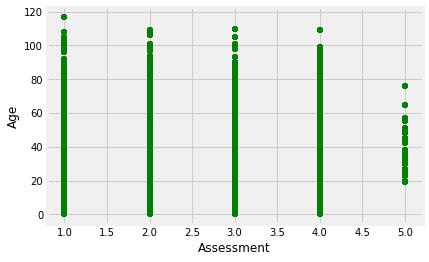

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline

data1 = data.loc[data['resultado_coronavirus_fase_2'] == "Sin sintomas"] 
data2 = data.loc[data['resultado_coronavirus_fase_2'] == "Sospechoso grave"] 

data['assessment'] = np.where(data['resultado_coronavirus_fase_2']== 'Sin sintomas', 1, 0)
data['assessment'] = np.where(data['resultado_coronavirus_fase_2']== 'Sospechoso grave', 4, data['assessment'])
data['assessment'] = np.where(data['resultado_coronavirus_fase_2']== 'Sospechoso leve', 3, data['assessment'])
data['assessment'] = np.where(data['resultado_coronavirus_fase_2']== 'Persona sintomas', 2, data['assessment'])
data['assessment'] = np.where(data['resultado_coronavirus_fase_2']== 'Positivo', 5, data['assessment'])

plt.xlabel('Assessment')
plt.ylabel('Age')
plt.scatter(data['assessment'],data['edad_clean'] ,color="green",marker='+')

item_counts = data['assessment'].value_counts()


#data.head()


Persona sintomas    67140
Sin sintomas        48939
Sospechoso grave    12515
Sospechoso leve     12290
Positivo               29
Name: resultado_coronavirus_fase_2, dtype: int64


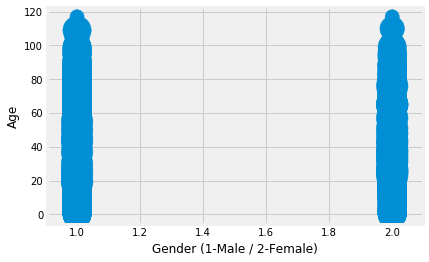

In [9]:
item_counts = data['resultado_coronavirus_fase_2'].value_counts()
print(item_counts)

plt.xlabel('Gender (1-Male / 2-Female)')
plt.ylabel('Age')
plt.scatter(x=data['sexo_clean'],y=data['edad_clean'], s=data["assessment"] * 200);

In [ ]:
df = pd.DataFrame(np.random.rand(10, 4), columns=["a", "b", "c", "d"])
df = data.sample(n=1000, random_state=1)
df.plot.scatter(x="assessment", y="edad_clean");
df.plot.scatter(x="a", y="b", data['assessment'].value_counts());

#data.plot.scatter(x=data["a"], y=data["b"], s=data["assessment"] * 200);

In [ ]:
cols = [0,1,2,3,4]

data.drop(data.columns[cols],axis=1,inplace=True)

data.head()

In [ ]:
item_counts = data["resultado_coronavirus_fase_2"].value_counts()
print(item_counts)